## Import necessary libraries

In [1]:
from nn import nn, preprocess, io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

## Create neural network instance

In [2]:
arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'sigmoid'},
       {'input_dim': 16, 'output_dim': 64, 'activation': 'sigmoid'}] # output layer

lr = 0.01 # Seems like a good place to start
n_seed = 42
batch_size = 200 
epochs = 200
loss_fun = 'mse'

nn_ae = nn.NeuralNetwork(arch, lr, n_seed, batch_size, epochs, loss_fun)

## Read in the 'digits' dataset using sklearn

In [3]:
digits = load_digits()

<Figure size 432x288 with 0 Axes>

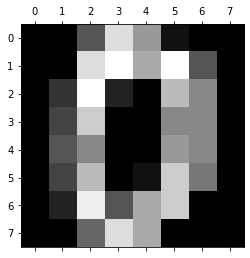

In [4]:
plt.gray()
plt.matshow(digits.images[0])
plt.show() # Let's have a look

In [5]:
X = digits.data
y = digits.target

## Split the 'digits' data into training and validation

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.8, random_state = 42) # 80/20 ratio is supposedly standard for training/validation in the field so split it like that

In [7]:
train_loss, val_loss = nn_ae.fit(X_train, X_train, X_val, X_val)

/home/sebastian/Documents/GitHub/project7/nn/nn.py:365: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-Z))


## Use the trained model to make predictions over the validation set

In [12]:
val_preds = nn_ae.predict(X_val)

/home/sebastian/Documents/GitHub/project7/nn/nn.py:365: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-Z))


## Calculate the MSE for the trained model over the validation set

In [14]:
nn_ae._mean_squared_error(val_preds, X_val)

54.946758166400336

## Plot the losses

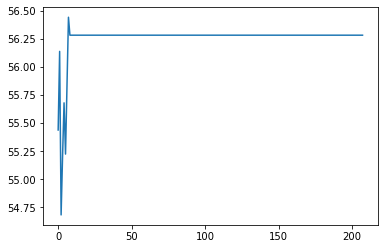

In [15]:
plt.plot(train_loss)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

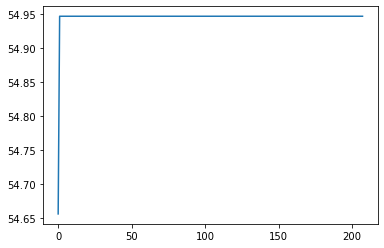

In [16]:
plt.plot(val_loss)
plt.show